In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress
from scipy.stats import ttest_rel

In [2]:
df = pd.read_csv('WorldCupMerged.csv')
df.head(3)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,game_winner,...,first_shooter,Shootout,team,scorer,minute,own_goal,penalty,Total attendance,Average attendance per game,year
0,1930-07-13,Belgium,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True,United States,...,NaN,False,United States,Bart McGhee,23.0,False,False,434000,24139,1930
1,1930-07-13,Belgium,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True,United States,...,NaN,False,United States,Tom Florie,45.0,False,False,434000,24139,1930
2,1930-07-13,Belgium,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True,United States,...,NaN,False,United States,Bert Patenaude,69.0,False,False,434000,24139,1930


### Graph of most improved and least improved teams for more than n matches (based off of games won/ lost)

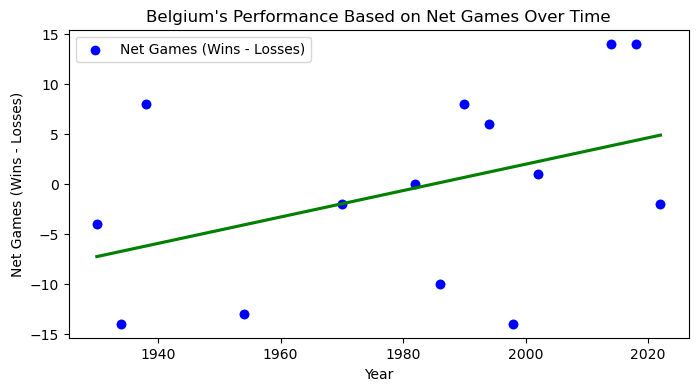

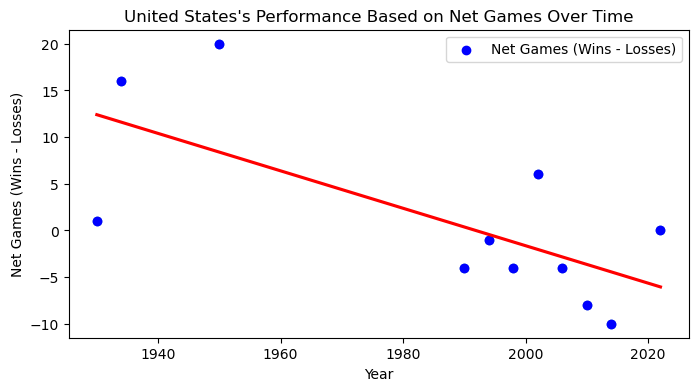

Slope for Belgium: 0.13204479768786131
Slope for United States: -0.20058615049073059


In [9]:
# Convert the date column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Modify the calculate_slope function to consider games lost as well
def calculate_slope(team_df):
    if team_df.empty or len(team_df) < 20:
        return None, None
    games_won = team_df[team_df['game_winner'] == team_df['home_team']].groupby(team_df['date'].dt.year)['game_winner'].count().reset_index(name='games_won')
    games_lost = team_df[team_df['game_winner'] != team_df['home_team']].groupby(team_df['date'].dt.year)['game_winner'].count().reset_index(name='games_lost')
    games_won = games_won.merge(games_lost, on='date', how='outer').fillna(0)
    games_won['net_games'] = games_won['games_won'] - games_won['games_lost']
    if len(games_won) <= 1:
        return None, None
    slope, _, _, _, _ = linregress(games_won['date'], games_won['net_games'])
    return slope, games_won

# Calculate slope for each team
teams = df['home_team'].unique()
team_slopes = {}

for team in teams:
    team_df = df[(df['home_team'] == team) | (df['away_team'] == team)]
    team_slope, team_wins = calculate_slope(team_df)
    if team_slope is not None:
        team_slopes[team] = (team_slope, team_wins)

# Filter teams with at least 10 games overall
team_slopes_filtered = {team: slopes for team, slopes in team_slopes.items() if len(slopes[1]) >= 10}

# Check if there are teams with valid slopes
if not team_slopes_filtered:
    print("No valid slopes calculated for teams with at least 20 games.")
else:
    # Find the team with the best and worst slope
    best_team = max(team_slopes_filtered, key=lambda x: team_slopes_filtered[x][0])
    worst_team = min(team_slopes_filtered, key=lambda x: team_slopes_filtered[x][0])

    # Plotting for the best team
    best_team_df = df[(df['home_team'] == best_team) | (df['away_team'] == best_team)]
    best_team_games_won = best_team_df[best_team_df['game_winner'] == best_team_df['home_team']].groupby(best_team_df['date'].dt.year)['game_winner'].count().reset_index(name='games_won')
    best_team_games_lost = best_team_df[best_team_df['game_winner'] != best_team_df['home_team']].groupby(best_team_df['date'].dt.year)['game_winner'].count().reset_index(name='games_lost')
    best_team_games_won = best_team_games_won.merge(best_team_games_lost, on='date', how='outer').fillna(0)
    best_team_games_won['net_games'] = best_team_games_won['games_won'] - best_team_games_won['games_lost']

    fig, ax = plt.subplots(figsize=(8, 4))
    sns.regplot(x=best_team_games_won['date'], y=best_team_games_won['net_games'], ci=None, line_kws={"color": "green"}, ax=ax)
    ax.scatter(team_slopes_filtered[best_team][1]['date'], team_slopes_filtered[best_team][1]['net_games'], color='blue', label='Net Games (Wins - Losses)')
    ax.set_title(f"{best_team}'s Performance Based on Net Games Over Time")
    ax.set_xlabel('Year')
    ax.set_ylabel('Net Games (Wins - Losses)')
    ax.legend()

    plt.show()

    # Plotting for the worst team
    worst_team_df = df[(df['home_team'] == worst_team) | (df['away_team'] == worst_team)]
    worst_team_games_won = worst_team_df[worst_team_df['game_winner'] == worst_team_df['home_team']].groupby(worst_team_df['date'].dt.year)['game_winner'].count().reset_index(name='games_won')
    worst_team_games_lost = worst_team_df[worst_team_df['game_winner'] != worst_team_df['home_team']].groupby(worst_team_df['date'].dt.year)['game_winner'].count().reset_index(name='games_lost')
    worst_team_games_won = worst_team_games_won.merge(worst_team_games_lost, on='date', how='outer').fillna(0)
    worst_team_games_won['net_games'] = worst_team_games_won['games_won'] - worst_team_games_won['games_lost']

    fig, ax = plt.subplots(figsize=(8, 4))
    sns.regplot(x=worst_team_games_won['date'], y=worst_team_games_won['net_games'], ci=None, line_kws={"color": "red"}, ax=ax)
    ax.scatter(team_slopes_filtered[worst_team][1]['date'], team_slopes_filtered[worst_team][1]['net_games'], color='blue', label='Net Games (Wins - Losses)')
    ax.set_title(f"{worst_team}'s Performance Based on Net Games Over Time")
    ax.set_xlabel('Year')
    ax.set_ylabel('Net Games (Wins - Losses)')
    ax.legend()

    plt.show()

    # Print slopes for the best and worst teams
    print(f"Slope for {best_team}: {team_slopes_filtered[best_team][0]}")
    print(f"Slope for {worst_team}: {team_slopes_filtered[worst_team][0]}")



### Graph of most improved and least improved teams for more than n matches (based off of goals scored)

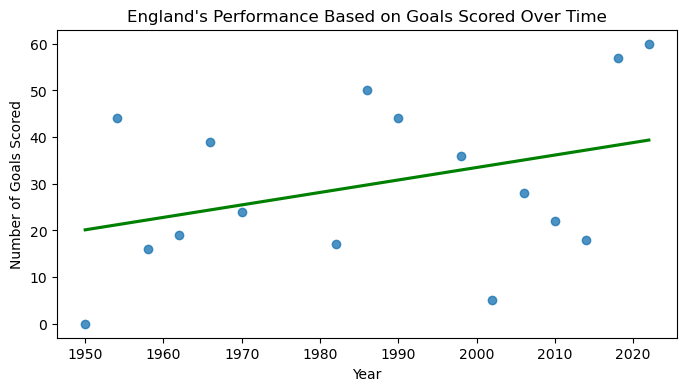

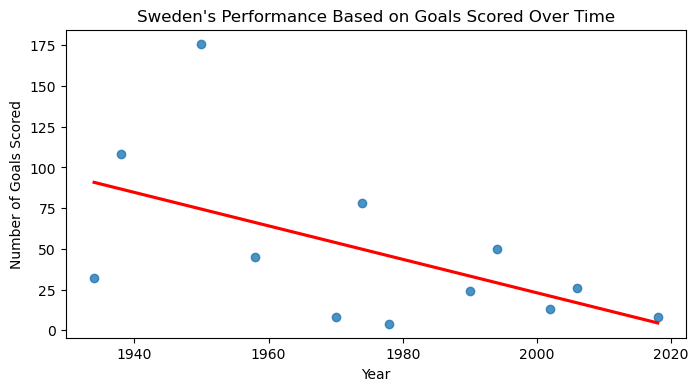

Slope for England: 0.2670833804729042
Slope for Sweden: -1.0281065088757397


In [10]:
# Convert the date column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Function to calculate slope for a team based on goals scored
def calculate_slope_goals(team_df):
    if team_df.empty or len(team_df) < 20:
        return None, None
    goals_scored = team_df.groupby(team_df['date'].dt.year)['home_score'].sum().reset_index(name='goals_scored')
    if len(goals_scored) <= 1:
        return None, None
    slope, _, _, _, _ = linregress(goals_scored['date'], goals_scored['goals_scored'])
    return slope, goals_scored

# Calculate slope for each team based on goals scored
teams = df['home_team'].unique()
team_goals_slopes = {}

for team in teams:
    team_df = df[(df['home_team'] == team) | (df['away_team'] == team)]
    team_slope, team_goals_scored = calculate_slope_goals(team_df)
    if team_slope is not None:
        team_goals_slopes[team] = (team_slope, team_goals_scored)

# Filter teams with at least 10 games overall
team_goals_slopes_filtered = {team: slopes for team, slopes in team_goals_slopes.items() if len(slopes[1]) >= 10}

# Check if there are teams with valid slopes
if not team_goals_slopes_filtered:
    print("No valid slopes calculated for teams with at least 20 games.")
else:
    # Find the team with the best and worst slope based on goals scored
    best_team_goals = max(team_goals_slopes_filtered, key=lambda x: team_goals_slopes_filtered[x][0])
    worst_team_goals = min(team_goals_slopes_filtered, key=lambda x: team_goals_slopes_filtered[x][0])

    # Plotting for the best team based on goals scored
    best_team_goals_df = df[(df['home_team'] == best_team_goals) | (df['away_team'] == best_team_goals)]
    best_team_goals_scored = best_team_goals_df.groupby(best_team_goals_df['date'].dt.year)['home_score'].sum().reset_index(name='goals_scored')

    fig, ax = plt.subplots(figsize=(8, 4))
    sns.regplot(x=best_team_goals_scored['date'], y=best_team_goals_scored['goals_scored'], ci=None, line_kws={"color": "green"}, ax=ax)
    ax.set_title(f"{best_team_goals}'s Performance Based on Goals Scored Over Time")
    ax.set_xlabel('Year')
    ax.set_ylabel('Number of Goals Scored')

    plt.show()

    # Plotting for the worst team based on goals scored
    worst_team_goals_df = df[(df['home_team'] == worst_team_goals) | (df['away_team'] == worst_team_goals)]
    worst_team_goals_scored = worst_team_goals_df.groupby(worst_team_goals_df['date'].dt.year)['home_score'].sum().reset_index(name='goals_scored')

    fig, ax = plt.subplots(figsize=(8, 4))
    sns.regplot(x=worst_team_goals_scored['date'], y=worst_team_goals_scored['goals_scored'], ci=None, line_kws={"color": "red"}, ax=ax)
    ax.set_title(f"{worst_team_goals}'s Performance Based on Goals Scored Over Time")
    ax.set_xlabel('Year')
    ax.set_ylabel('Number of Goals Scored')

    plt.show()

    # Print slopes for the best and worst teams based on goals scored
    print(f"Slope for {best_team_goals}: {team_goals_slopes_filtered[best_team_goals][0]}")
    print(f"Slope for {worst_team_goals}: {team_goals_slopes_filtered[worst_team_goals][0]}")
